# **数据读取**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
from sklearn.utils import resample

In [ ]:
train_df = pd.read_csv('/content/drive/MyDrive/news/train_set.csv', sep='\t', nrows=30000)   #sep='\t'表示数据文件使用制表符分隔每个字段
train_df.head(10)

,label,text
0,2,2967 6758 339 2021 1854 3731 4109 3792 4149 15...
1,11,4464 486 6352 5619 2465 4802 1452 3137 5778 54...
2,3,7346 4068 5074 3747 5681 6093 1777 2226 7354 6...
3,2,7159 948 4866 2109 5520 2490 211 3956 5520 549...
4,3,3646 3055 3055 2490 4659 6065 3370 5814 2465 5...
5,9,3819 4525 1129 6725 6485 2109 3800 5264 1006 4...
6,3,307 4780 6811 1580 7539 5886 5486 3433 6644 58...
7,10,26 4270 1866 5977 3523 3764 4464 3659 4853 517...
8,12,2708 2218 5915 4559 886 1241 4819 314 4261 166...
9,3,3654 531 1348 29 4553 6722 1474 5099 7541 307 ...


In [ ]:
class_counts = train_df['label'].value_counts()
minority_class = class_counts.idxmin()
df_balanced = pd.DataFrame()  # 创建空的数据框用于存储均衡后的数据

for label in train_df['label'].unique():
    df_label = train_df[train_df['label'] == label]
    df_balanced = df_balanced.append(df_label.sample(n=class_counts[minority_class], replace=True, random_state=1234))

df_balanced.reset_index(drop=True, inplace=True)  # 重置索引


<ipython-input-4-6da4dfb2971c>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_balanced = df_balanced.append(df_label.sample(n=class_counts[minority_class], replace=True, random_state=1234))
<ipython-input-4-6da4dfb2971c>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_balanced = df_balanced.append(df_label.sample(n=class_counts[minority_class], replace=True, random_state=1234))
<ipython-input-4-6da4dfb2971c>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_balanced = df_balanced.append(df_label.sample(n=class_counts[minority_class], replace=True, random_state=1234))
<ipython-input-4-6da4dfb2971c>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pand

# **数据分析**

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter

## 原始数据

In [ ]:
#分析句子长度
train_df['text_len'] = train_df['text'].apply(lambda x: len(x.split(' ')))
train_df['text_len'].describe()

count    200000.000000
mean        907.207110
std         996.029036
min           2.000000
25%         374.000000
50%         676.000000
75%        1131.000000
max       57921.000000
Name: text_len, dtype: float64

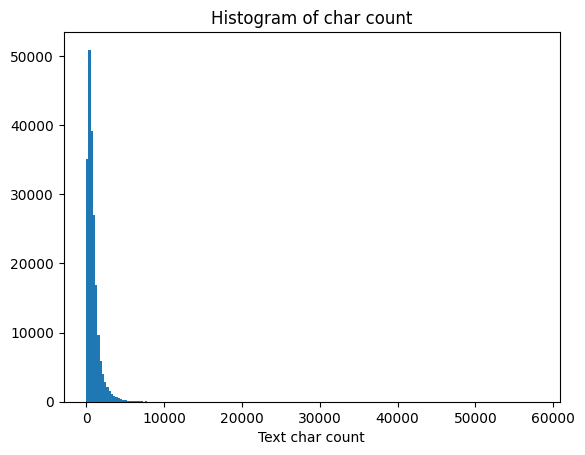

In [ ]:
# 绘制句子长度的直方图
_ = plt.hist(train_df['text_len'], bins=200)
plt.xlabel('Text char count')
plt.title("Histogram of char count")
plt.savefig('./text_chart_count.png')
plt.show()

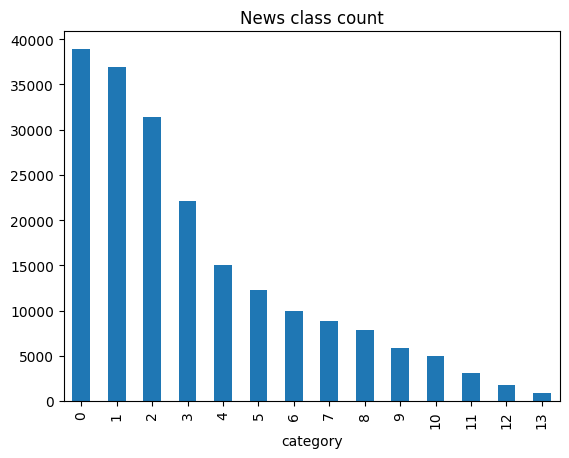

In [ ]:
#绘制每类新闻样本个数的直方图
train_df['label'].value_counts().plot(kind='bar')
plt.title('News class count')
plt.xlabel("category")
plt.savefig('./category.png')
plt.show()

In [ ]:
#'text'列转换为列表，然后将列表中的元素用空格连接起来，得到一个包含所有文本的字符串。
all_lines = ' '.join(list(train_df['text']))

#对字符串进行单词计数，将每个单词作为键，出现的次数作为值，形成一个计数器对象。
word_count = Counter(all_lines.split(" "))

#将单词按照出现次数从大到小进行排序，根据计数器对象中的值进行排序，降序排列。
word_count = sorted(word_count.items(), key=lambda d:d[1], reverse = True)

In [ ]:
print("len(word_count): ", len(word_count)) 
print("word_count[0]: ", word_count[0]) 
print("word_count[-1]: ", word_count[-1]) 

len(word_count):  4391
word_count[0]:  ('3750', 72572)
word_count[-1]:  ('1974', 1)


In [ ]:
#将每个文本的唯一单词提取出来，用空格连接成一个字符串。然后将结果存储在"text_unique"列中。
train_df['text_unique'] = train_df['text'].apply(lambda x: ' '.join(list(set(x.split(' ')))))

#将"text_unique"列的所有元素连接成一个字符串
all_lines = ' '.join(list(train_df['text_unique']))

word_count = Counter(all_lines.split(" "))
word_count = sorted(word_count.items(), key=lambda d: int(d[1]), reverse = True)

In [ ]:
print("len(word_count): ", len(word_count)) 
print("word_count[0]: ", word_count[0]) 
print("word_count[1]: ", word_count[1]) 
print("word_count[2]: ", word_count[2]) 

len(word_count):  4391
word_count[0]:  ('900', 1986)
word_count[1]:  ('3750', 1985)
word_count[2]:  ('648', 1906)


## 均衡数据

In [ ]:
#分析句子长度
df_balanced['text_len'] = df_balanced['text'].apply(lambda x: len(x.split(' ')))
df_balanced['text_len'].describe()

count    1890.000000
mean      895.621693
std       832.590781
min        24.000000
25%       343.250000
50%       659.000000
75%      1144.000000
max      6050.000000
Name: text_len, dtype: float64

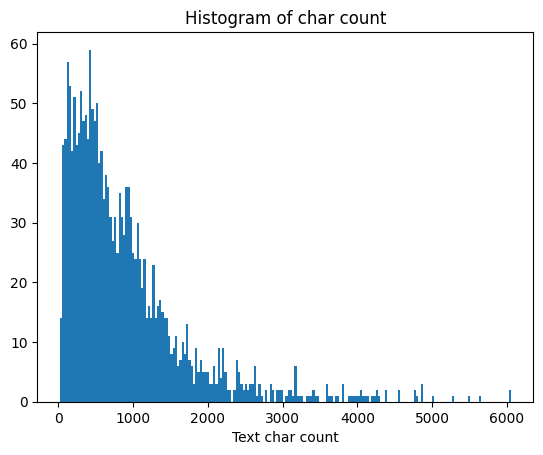

In [ ]:
# 绘制句子长度的直方图
_ = plt.hist(df_balanced['text_len'], bins=200)
plt.xlabel('Text char count')
plt.title("Histogram of char count")
plt.savefig('./text_chart_count.png')
plt.show()

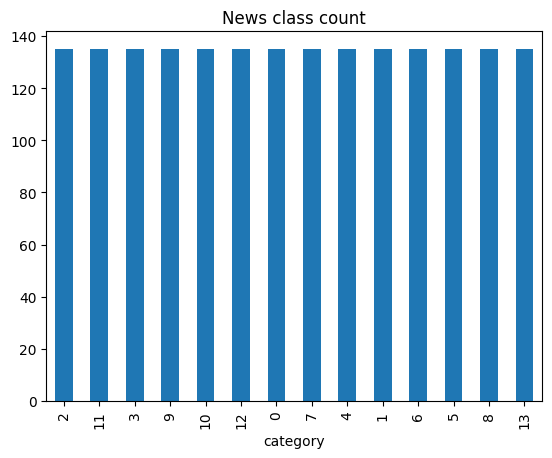

In [ ]:
#绘制每类新闻样本个数的直方图
df_balanced['label'].value_counts().plot(kind='bar')
plt.title('News class count')
plt.xlabel("category")
plt.savefig('./category.png')
plt.show()

In [ ]:
#'text'列转换为列表，然后将列表中的元素用空格连接起来，得到一个包含所有文本的字符串。
all_lines = ' '.join(list(df_balanced['text']))

#对字符串进行单词计数，将每个单词作为键，出现的次数作为值，形成一个计数器对象。
word_count = Counter(all_lines.split(" "))

#将单词按照出现次数从大到小进行排序，根据计数器对象中的值进行排序，降序排列。
word_count = sorted(word_count.items(), key=lambda d:d[1], reverse = True)

In [ ]:
print("len(word_count): ", len(word_count)) 
print("word_count[0]: ", word_count[0]) 
print("word_count[-1]: ", word_count[-1]) 

len(word_count):  4461
word_count[0]:  ('3750', 71521)
word_count[-1]:  ('193', 1)


In [ ]:
#将每个文本的唯一单词提取出来，用空格连接成一个字符串。然后将结果存储在"text_unique"列中。
df_balanced['text_unique'] = df_balanced['text'].apply(lambda x: ' '.join(list(set(x.split(' ')))))

#将"text_unique"列的所有元素连接成一个字符串
all_lines = ' '.join(list(df_balanced['text_unique']))

word_count = Counter(all_lines.split(" "))
word_count = sorted(word_count.items(), key=lambda d: int(d[1]), reverse = True)

In [ ]:
print("len(word_count): ", len(word_count)) 
print("word_count[0]: ", word_count[0]) 
print("word_count[1]: ", word_count[1]) 
print("word_count[2]: ", word_count[2]) 

len(word_count):  4461
word_count[0]:  ('3750', 1871)
word_count[1]:  ('900', 1853)
word_count[2]:  ('648', 1812)


# **机器学习编码**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

## Count-Vectors词袋

In [ ]:
#创建一个CountVectorizer对象，最多选择1000个最常见的单词进行向量化
vectorizer = CountVectorizer(max_features=1000)

#fit_transform方法返回一个稀疏矩阵表示的文本向量化结果
train_test_CV = vectorizer.fit_transform(df_balanced['text'])

In [ ]:
train_test_CV_array = train_test_CV.toarray()
train_test_CV_array[:2, :22]

array([[ 0,  0,  0,  2,  0,  0,  0, 11,  0, 12,  0,  0,  0,  0,  0,  0,
         0,  0,  2,  0,  0,  0],
       [ 0,  0,  0,  4,  0,  0,  0,  8,  3, 11,  0,  1,  0,  0,  0,  0,
         0,  0,  0,  1,  0,  0]])

## TF-IDF

In [ ]:
#创建一个TfidfVectorizer对象，考虑单个词语、两个词语的组合以及三个词语的组合作为特征，最多选择1000个最重要的特征进行向量化。
tfidf = TfidfVectorizer(ngram_range=(1, 3), max_features=1000)

#fit_transform方法返回一个稀疏矩阵表示的文本向量化结果
train_test_TF = tfidf.fit_transform(df_balanced['text'])

train_test_TF.shape

(1890, 1000)

In [ ]:
train_test_TF_array = train_test_TF.toarray()
train_test_TF_array[:2, :22]

array([[0.        , 0.        , 0.        , 0.04988234, 0.        ,
        0.        , 0.25094515, 0.06943774, 0.17910699, 0.        ,
        0.        , 0.38258354, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.04647173, 0.        ,
        0.        , 0.08501354, 0.06469005, 0.01390507, 0.02679652,
        0.0125071 , 0.16336149, 0.        , 0.01617251, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.01148706, 0.        ]])

# **机器学习文本分类**

In [ ]:
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import f1_score
import lightgbm as lgb
from sklearn.model_selection import train_test_split

from sklearn.datasets import load_iris
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMClassifier

## gpu尝试

In [ ]:
!git clone https://github.com/Microsoft/LightGBM

Cloning into 'LightGBM'...
remote: Enumerating objects: 29605, done.
remote: Counting objects: 100% (3139/3139), done.
remote: Compressing objects: 100% (291/291), done.
remote: Total 29605 (delta 2945), reused 2962 (delta 2847), pack-reused 26466
Receiving objects: 100% (29605/29605), 20.56 MiB | 19.46 MiB/s, done.
Resolving deltas: 100% (22002/22002), done.


In [ ]:
%cd /content/drive/MyDrive/LightGBM
!git submodule update --init --recursive

/content/drive/MyDrive/LightGBM


In [ ]:
%cd /content/drive/MyDrive/LightGBM/
!mkdir build
!cmake -DUSE_GPU=1 #avoid ..
!make -j$(nproc)

/content/drive/MyDrive/LightGBM
mkdir: cannot create directory ‘build’: File exists
CMake Warning:
  No source or binary directory provided.  Both will be assumed to be the
  same as the current working directory, but note that this warning will
  become a fatal error in future CMake releases.


-- OpenCL include directory: /usr/include
-- Using _mm_prefetch
-- Using _mm_malloc
-- Configuring done
-- Generating done
-- Build files have been written to: /content/drive/MyDrive/LightGBM
[ -1%] Building CXX object CMakeFiles/lightgbm_objs.dir/src/boosting/boosting.cpp.o
[  0%] Building CXX object CMakeFiles/lightgbm_capi_objs.dir/src/c_api.cpp.o
[  1%] Building CXX object CMakeFiles/lightgbm_objs.dir/src/boosting/cuda/cuda_score_updater.cpp.o
[  3%] Building CXX object CMakeFiles/lightgbm_objs.dir/src/boosting/gbdt.cpp.o
[  3%] Built target lightgbm_capi_objs
[  5%] Building CXX object CMakeFiles/lightgbm_objs.dir/src/boosting/gbdt_model_text.cpp.o
[  7%] Building CXX object CMakeFiles/lig

In [ ]:
!sudo apt-get -y install python-pip

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Package python-pip is not available, but is referred to by another package.
This may mean that the package is missing, has been obsoleted, or
is only available from another source
However the following packages replace it:
  python3-pip

E: Package 'python-pip' has no installation candidate


In [ ]:
!sudo -H pip install setuptools pandas numpy scipy scikit-learn -U

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 18.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 74.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 67.3 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 67.7.2
    Uninstalling setuptools-67.7.2:
      Successfully uninstalled setuptools-67.7.2
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.3

In [ ]:
%cd /content/drive/My\ Drive/LightGBM/python-package
!sudo python setup.py install

/content/drive/My Drive/LightGBM/python-package
Traceback (most recent call last):
  File "/content/drive/My Drive/LightGBM/python-package/setup.py", line 300, in <module>
    version = _version_file.read_text(encoding='utf-8').strip()
  File "/usr/lib/python3.10/pathlib.py", line 1134, in read_text
    with self.open(mode='r', encoding=encoding, errors=errors) as f:
  File "/usr/lib/python3.10/pathlib.py", line 1119, in open
    return self._accessor.open(self, mode, buffering, encoding, errors,
FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/My Drive/LightGBM/python-package/lightgbm/VERSION.txt'


## 岭回归分类器

In [ ]:
clf = RidgeClassifier()
clf.fit(train_test_CV[:1400], df_balanced['label'].values[:1400])

val_pred = clf.predict(train_test_CV[1400:])
print(f1_score(df_balanced['label'].values[1400:], val_pred, average='macro'))

0.03961584633853542


In [ ]:
clf = RidgeClassifier()
clf.fit(train_test_TF[:1400], df_balanced['label'].values[:1400])

val_pred = clf.predict(train_test_TF[1400:])
print(f1_score(train_df['label'].values[1400:], val_pred, average='macro'))

0.0641573994867408


## LightGBM

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(train_test_TF, df_balanced['label'].values, test_size=0.3, random_state=1234)

In [ ]:

model = LGBMClassifier(
    objective='multiclass',
    num_leaves=50,
    learning_rate=0.1, 
    n_estimators=10, 
    max_depth=1, 
    subsample = 0.8,
    colsample_bytree = 0.8)

model.fit(X_train,y_train)

LGBMClassifier(colsample_bytree=0.8, max_depth=1, n_estimators=10,
               num_leaves=50, objective='multiclass', subsample=0.8)

In [ ]:
# 获取模型的训练参数
params = model.get_params()

# 打印训练参数
for param, value in params.items():
    print(f"{param}: {value}")

boosting_type: gbdt
class_weight: None
colsample_bytree: 0.8
importance_type: split
learning_rate: 0.1
max_depth: 6
min_child_samples: 20
min_child_weight: 0.001
min_split_gain: 0.0
n_estimators: 43
n_jobs: -1
num_leaves: 50
objective: multiclass
random_state: None
reg_alpha: 0.0
reg_lambda: 0.0
silent: warn
subsample: 0.8
subsample_for_bin: 200000
subsample_freq: 0


In [ ]:
y_pred = model.predict(X_val)
y_pred

array([11, 10,  7,  5,  1, 12,  6,  2,  5,  3,  8,  1,  6,  6, 12,  4,  9,
        1,  6,  5,  5, 10, 12,  7,  8,  2, 10,  7,  9, 13,  1,  3,  7,  0,
        3, 12,  6,  4, 10,  1,  7,  1,  0,  2, 12,  8,  6,  1,  3,  1, 11,
        3, 13, 13, 12,  6,  4,  6,  0,  5,  9,  8,  9,  6,  9,  3, 12,  1,
        0, 13, 10, 11,  5,  0,  2, 11, 11,  6,  2,  4,  1,  1,  2, 11,  0,
        0,  2,  4,  4,  5,  8,  2,  8,  9,  5, 10,  5,  0,  9,  4,  8,  0,
        8,  7,  4,  3,  1,  5, 13, 13, 11, 10,  3,  1, 12, 13,  9,  7,  9,
        2,  2, 10,  1,  3,  4,  0,  4,  4, 10,  2, 12,  0, 12,  3,  8,  2,
       12, 13,  7,  8, 13, 13,  5,  5,  3,  2, 11,  1,  1,  6,  7, 10,  5,
        4, 11,  6, 13,  3, 11,  5,  0,  8, 13, 12, 11, 10,  2, 12,  0,  8,
       13, 12,  3,  1, 11,  3,  8, 11,  5, 10, 11, 13, 11,  9,  1,  2,  0,
        6,  3, 13, 11,  7, 11, 10, 10,  3,  3,  5,  9, 10, 11, 13,  4,  6,
        2,  1, 11,  0,  0,  1,  4,  2, 11,  1,  1,  6,  1,  9,  2, 13,  7,
        6,  1, 13,  7,  0

In [ ]:
f1_macro = f1_score(y_val, y_pred, average='macro')
print(f"F1 score (macro): {f1_macro}")

F1 score (macro): 0.7500005661012473


In [ ]:
model_lgb = lgb.LGBMClassifier(
    objective='multiclass',
    num_leaves=50,
    learning_rate=0.1, 
    n_estimators=43, 
    max_depth=6,
    num_class=14, 
    subsample = 0.8,
    colsample_bytree = 0.8
    )


params_test0={    
			'n_estimators':[30, 50, 70, 90, 110, 130],
			}

gsearch0 = GridSearchCV(model_lgb,params_test0,scoring='f1_macro',cv=5,
						verbose=1, 
						n_jobs=-1)

gsearch0.fit(X_train,y_train)
print(gsearch0.best_params_,gsearch0.best_score_)

#{'n_estimators': 110} 0.8613052977470691
#{'n_estimators': 100} 0.8628364756638612

Fitting 5 folds for each of 3 candidates, totalling 15 fits
{'n_estimators': 100} 0.8628364756638612


In [ ]:
model_lgb = lgb.LGBMClassifier(
    objective='multiclass',
    num_leaves=50,
    learning_rate=0.1, 
    n_estimators=100, 
    max_depth=6,
    num_class=14, 
    subsample = 0.8,
    colsample_bytree = 0.8
    )


params_test1={    
      'num_leaves':[10, 20, 60, 100],
      'max_depth':[3, 5, 7]
			}

gsearch1 = GridSearchCV(model_lgb,params_test1,scoring='f1_macro',cv=5,
						verbose=1, 
						n_jobs=-1)

gsearch1.fit(X_train,y_train)
print(gsearch1.best_params_,gsearch1.best_score_)

#{'max_depth': 5, 'num_leaves': 20} 0.8596734952978903
#{'max_depth': 6, 'num_leaves': 30} 0.8628364756638612
#{'max_depth': 6, 'num_leaves': 32} 0.8628364756638612
#{'max_depth': 6, 'num_leaves': 36} 0.8628364756638612
#{'max_depth': 6, 'num_leaves': 29} 0.8643279079068611

Fitting 5 folds for each of 1 candidates, totalling 5 fits
{'max_depth': 6, 'num_leaves': 29} 0.8643279079068611


In [ ]:
model_lgb = lgb.LGBMClassifier(
    objective='multiclass',
    num_leaves=29,
    learning_rate=0.1, 
    n_estimators=100, 
    max_depth=6,
    num_class=14, 
    subsample = 0.8,
    colsample_bytree = 0.8
    )


params_test2={
    'min_child_weight':[0.001, 0],
    'min_child_samples':[19, 20, 21]
			}

gsearch2 = GridSearchCV(model_lgb,params_test2,scoring='f1_macro',cv=5,
						verbose=1, 
						n_jobs=-1)

gsearch2.fit(X_train,y_train)
print(gsearch2.best_params_,gsearch2.best_score_)

#{'min_child_samples': 20, 'min_child_weight': 0.001} 0.8643279079068611

Fitting 5 folds for each of 6 candidates, totalling 30 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
3 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py", line 967, in fit
    super().fit(X, _y, sample_weight=sample_weight, init_score=init_score, eval_set=valid_sets,
  File "/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py", line 748, in fit
    self._Booster = train(
  File "/usr/local/li

{'min_child_samples': 20, 'min_child_weight': 0.001} 0.8643279079068611


In [ ]:
model_lgb = lgb.LGBMClassifier(
    objective='multiclass',
    num_leaves=29,
    learning_rate=0.1, 
    n_estimators=100, 
    max_depth=6,
    num_class=14, 
    subsample = 0.8,
    colsample_bytree = 0.8,
    min_child_samples = 20,
    min_child_weight = 0.01
    )


params_test3={    
      'colsample_bytree':[0.78, 0.76, 0.8, 0.82, 0.84]
			}

gsearch3 = GridSearchCV(model_lgb,params_test3,scoring='f1_macro',cv=5,
						verbose=1, 
						n_jobs=-1)

gsearch3.fit(X_train,y_train)
print(gsearch3.best_params_,gsearch3.best_score_)

#{'colsample_bytree': 0.8, 'subsample': 0.8} 0.8564652411705895
#{'colsample_bytree': 0.8} 0.8564652411705895

Fitting 5 folds for each of 5 candidates, totalling 25 fits
{'colsample_bytree': 0.8} 0.8564652411705895


In [ ]:
model_lgb = lgb.LGBMClassifier(
    objective='multiclass',
    num_leaves=29,
    learning_rate=0.1, 
    n_estimators=100, 
    max_depth=6,
    num_class=14, 
    subsample = 0.8,
    colsample_bytree = 0.8,
    min_child_samples = 20,
    min_child_weight = 0.01
    )


params_test4={    
      'reg_alpha':[0.001, 0.005]
			}

gsearch4 = GridSearchCV(model_lgb,params_test4,scoring='f1_macro',cv=5,
						verbose=1, 
						n_jobs=-1)

gsearch4.fit(X_train,y_train)
print(gsearch4.best_params_,gsearch4.best_score_)

#{'reg_alpha': 0.001, 'reg_lambda': 0} 0.8608563142312239

Fitting 5 folds for each of 2 candidates, totalling 10 fits
{'reg_alpha': 0.001} 0.8608563142312239


In [ ]:
model_lgb = lgb.LGBMClassifier(
    objective='multiclass',
    num_leaves=29,
    learning_rate=0.005, 
    n_estimators=100, 
    max_depth=6,
    num_class=14, 
    subsample = 0.8,
    colsample_bytree = 0.8,
    min_child_samples = 20,
    min_child_weight = 0.01,
    reg_alpha = 0.001,
    reg_lambda = 0
    )


params_test4={    
      'n_estimators':[200, 250, 300],
			}

gsearch4 = GridSearchCV(model_lgb,params_test4,scoring='f1_macro',cv=5,
						verbose=1, 
						n_jobs=-1)

gsearch4.fit(X_train,y_train)
print(gsearch4.best_params_,gsearch4.best_score_)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
{'n_estimators': 300} 0.8162780749214585


In [ ]:
best_params = {
    'num_leaves':29,
    'objective':'multiclass',
    'learning_rate':0.01,  
    'n_estimators':2000, 
    'max_depth':6,
    'num_class':14,
    'subsample':0.8,
    'colsample_bytree':0.8,
    'min_child_samples':20,
    'min_child_weight':0.01,
    'reg_alpha':0.001,
    'reg_lambda':0

}

final_model = LGBMClassifier(**best_params)
final_model.fit(X_train, y_train)
y_final_pred = final_model.predict(X_val)
f1_final_macro = f1_score(y_val, y_final_pred, average='macro')
print(f"F1 final score (macro): {f1_final_macro}")

F1 final score (macro): 0.8745926574518142


# **深度学习文本分类**

## TextCNN

In [ ]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from collections import Counter 
from gensim.models import Word2Vec
import numpy as np
from sklearn import preprocessing
from sklearn.metrics import precision_score, accuracy_score,recall_score, f1_score,roc_auc_score, precision_recall_fscore_support, roc_curve, classification_report

C:\Users\Liuzx\AppData\Local\Temp\ipykernel_4920\1786333247.py:34: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  C:\b\abs_bao0hdcrdh\croot\pytorch_1675190257512\work\torch\csrc\utils\tensor_new.cpp:204.)
  input_batch = Variable(torch.LongTensor(inputs))


Epoch: 1000 cost = 0.577819
Epoch: 2000 cost = 0.328822
Epoch: 3000 cost = 0.115446
Epoch: 4000 cost = 0.024982
Epoch: 5000 cost = 0.029934
sorry hate you is Bad Mean...


In [ ]:
w2v = Word2Vec(sentences=X_train,size=300,window=5,min_count=5,sample=1e-3,sg=1)
w2v.save("bag")

In [ ]:
# w2v = Word2Vec.load("bag") 第一次训练完成后，后续只需使用加载本地模型即可
def average(text,size=300):
    if len(text) < 1:
        return np.zeros(size)
    a = [w2v.wv[w] if w in w2v.wv else np.zeros(size) for w in text]
    length = len(a)
    summed = np.sum(a,axis=0)
    ave = np.divide(summed,length)
    return ave
X = X_train.apply(average)
list_corpus = X.tolist()

In [ ]:
x_train_cnn,x_test_cnn,y_train_cnn,y_test_cnn = train_test_split(list_corpus,y_train,test_size=0.3,random_state=1234)

In [ ]:
x_train_cnn=pd.DataFrame(x_train_cnn)
x_test_cnn=pd.DataFrame(x_test_cnn)
x_train_cnn=x_train_cnn.values.reshape(x_train_cnn.shape[0],x_train_cnn.shape[1],1)
x_test_cnn=x_test_cnn.values.reshape(x_test_cnn.shape[0],x_test_cnn.shape[1],1)
y_train_cnn=np.array(y_train_cnn)
y_test_cnn=np.array(y_test_cnn)

In [ ]:
x_train_cnn.shape,y_train_cnn.shape,x_test_cnn.shape,y_test_cnn.shape

In [ ]:
num_classes=14
cnn=tf.keras.Sequential([tf.keras.layers.Conv1D(input_shape=x_train_cnn.shape[1:],filters=32,kernel_size=5,strides=1,
                                                padding='same',activation='relu',name='conv1'),
                           tf.keras.layers.MaxPool1D(pool_size=5,strides=2,name='pool1'),
                           tf.keras.layers.Conv1D(filters=64,kernel_size=5,strides=1,
                                                  padding='same',activation='relu',name='conv2'),
                           tf.keras.layers.MaxPool1D(pool_size=5,strides=2,name='pool2'),                           
                           tf.keras.layers.Conv1D(filters=128,kernel_size=5,strides=1,
                                                  padding='same',activation='relu',name='conv3'),
                           tf.keras.layers.MaxPool1D(pool_size=5,strides=2,name='pool3'),
                           tf.keras.layers.Flatten(),
                           tf.keras.layers.Dense(128,activation='relu',name='fc1'),
                           tf.keras.layers.Dense(64,activation='relu',name='fc2'),
                           tf.keras.layers.Dropout(0.5),
                           tf.keras.layers.Dense(32,activation='relu',name='fc3'),                        
                           tf.keras.layers.Dense(num_classes,activation='softmax',name='output')])
nadam = tf.keras.optimizers.Nadam(lr=1e-3)
cnn.compile(optimizer=nadam,loss='categorical_crossentropy',metrics=['categorical_accuracy']) #设置优化器和损失函数
cnn.summary()

In [ ]:
history=cnn.fit(x_train_cnn,y_train_cnn,epochs=100,verbose=1)

In [ ]:
plt.plot(history.history['loss'])
plt.legend(['training'], loc='upper left')
plt.show()

In [ ]:
predict_prop=cnn.predict(x_test_cnn)
predict_prop.shape

## LSTM

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

In [ ]:
train_test_LSTM = X_train.toarray()  # 将稀疏矩阵转换为稠密矩阵

In [ ]:
# 确保Colab使用GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
class CustomDataset(Dataset):
    def __init__(self, text_data, labels):
        self.text_data = text_data
        self.labels = labels
        self.length = len(self.text_data)
        
    def __len__(self):
        return self.length
    
    def __getitem__(self, index):
        text = self.text_data[index]
        label = self.labels[index]
        return text, label

In [ ]:
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(LSTMModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_classes)
    
    def forward(self, x):
        # 初始化LSTM的隐藏状态和记忆单元状态
        # 初始化LSTM的隐藏状态和记忆单元状态
        h0 = torch.zeros(self.num_layers * 1, x.size(0), self.hidden_size).to(device)
        c0 = torch.zeros(self.num_layers * 1, x.size(0), self.hidden_size).to(device)

        
        # 前向传播
        out, _ = self.lstm(x, (h0, c0))
        
        # 获取最后一个时间步的输出
        out = self.fc(out[:, -1, :])
        return out

# 设置超参数
input_size = 1000  # 输入大小为TF-IDF特征数量
hidden_size = 128  # 隐藏层大小
num_layers = 2  # LSTM层数
num_classes = 14  # 类别数量

# 创建LSTM模型实例
# 创建模型实例并将其移至GPU
model = LSTMModel(input_size, hidden_size, num_layers, num_classes).to(device)

# 定义损失函数和优化器
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# 将训练数据和标签移至GPU
train_data = train_data.to(device)
train_labels = train_labels.to(device)

# 在GPU上训练模型
for epoch in range(num_epochs):
    # 前向传播
    outputs = model(train_data)
    loss = criterion(outputs, train_labels)
    
    # 反向传播和优化
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # 输出训练信息
    if (epoch+1) % 10 == 0:
      print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# 打印模型结构
print(model)

AssertionError: ignored

In [ ]:
def train_model(model, train_loader, criterion, optimizer):
    model.train()
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

def evaluate_model(model, data_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in data_loader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs, dim=1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = correct / total
    return accuracy


In [ ]:
def main():
    # 数据预处理和划分
    # ...

    # 创建数据集和数据加载器
    train_dataset = CustomDataset(train_test_LSTM, df_balanced['label'].values)
    val_dataset = CustomDataset(X_val, y_val)
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

    # 定义损失函数和优化器
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    # 训练和评估模型
    for epoch in range(num_epochs):
        train_model(model, train_loader, criterion, optimizer)
        accuracy = evaluate_model(model, val_loader)
        print(f"Epoch {epoch+1}/{num_epochs}, Val Accuracy: {accuracy:.4f}")

    # 在测试集上评估模型
    test_dataset = CustomDataset(X_test, y_test)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
    test_accuracy = evaluate_model(model, test_loader)
    print(f"Test Accuracy: {test_accuracy:.4f}")

# 运行主函数
if __name__ == '__main__':
    main()


TypeError: ignored

## bert

In [5]:
import logging
import random

import numpy as np
import torch

In [2]:
logging.basicConfig(level=logging.INFO, format='%(asctime)-15s %(levelname)s: %(message)s')

In [3]:
# 设置随机种子
seed = 1234
random.seed(seed)
np.random.seed(seed)
torch.cuda.manual_seed(seed)
torch.manual_seed(seed)

In [4]:
# 使用CUDA进行计算，并将相GPU关联到PyTorch的计算操作中
gpu = 0
use_cuda = gpu >= 0 and torch.cuda.is_available()
if use_cuda:
    torch.cuda.set_device(gpu)
    device = torch.device("cuda", gpu)
else:
    device = torch.device("cpu")
logging.info("Use cuda: %s, gpu id: %d.", use_cuda, gpu)

In [ ]:
import pandas as pd

In [7]:
# 指定划分数据集为10折
fold_num = 10
data_file = '/content/drive/MyDrive/news/train_set.csv'

In [ ]:
# 将数据集划分为多个折并返回折数据。
def all_data2fold(fold_num, num=10000):   # fold_num：指定要划分的折数；num：指定用于划分的样本数量，默认为10000
    fold_data = []

    # 读取数据
    f = pd.read_csv(data_file, sep='\t', encoding='UTF-8')   # encoding='UTF-8'表示使用UTF-8编码读取文件。
    texts = f['text'].tolist()[:num]   # 将数据文件中的文本列提取为texts列表，并使用tolist()方法将其转换为Python列表
    labels = f['label'].tolist()[:num]   # [:num]表示只取前num个样本。

    total = len(labels)

    # 随机打乱数据
    index = list(range(total))   # 创建索引
    np.random.shuffle(index)   # 对索引列表进行随机打乱
    all_texts = []
    all_labels = []
    for i in index:
        all_texts.append(texts[i])   # 将第i个索引对应的文本添加到all_texts列表中
        all_labels.append(labels[i])

    # 创建标签字典（每个类别标签映射到一个索引列表，列表中包含了属于该类别的样本的索引）
    label2id = {}
    for i in range(total):
        label = str(all_labels[i])
        if label not in label2id:
            label2id[label] = [i]   # 创建一个新的键值对，键为类别标签，值为包含当前索引i的列表
        else:
            label2id[label].append(i)   # 将当前索引i添加到该类别标签对应的索引列表中

    # 创建列表all_index，包含fold_num个列表，每个列表中存储了对应折的样本索引
    all_index = [[] for _ in range(fold_num)]
    for label, data in label2id.items():   # 遍历label2id字典中的每个键值对
        # print(label, len(data))
        batch_size = int(len(data) / fold_num)   # 计算该类别中每个折的样本数量
        other = len(data) - batch_size * fold_num   # 计算剩余的样本数量
        for i in range(fold_num):
            cur_batch_size = batch_size + 1 if i < other else batch_size   # 把剩余样本分到前other折里
            # print(cur_batch_size)
            batch_data = [data[i * batch_size + b] for b in range(cur_batch_size)]
            all_index[i].extend(batch_data)

    batch_size = int(total / fold_num)   # 每个折中的标准样本数量
    other_texts = []
    other_labels = []
    other_num = 0
    start = 0

    # 建立列表fold_data，包含了每个折的文本和标签数据
    for fold in range(fold_num):
        num = len(all_index[fold])   # 当前折的样本数量
        texts = [all_texts[i] for i in all_index[fold]]   # 提取对应的文本数据
        labels = [all_labels[i] for i in all_index[fold]]   # 提取对应的标签数据

        # 如果比标准多了，把多出来的放进other_texts和other_labels
        if num > batch_size:
            fold_texts = texts[:batch_size]
            other_texts.extend(texts[batch_size:])
            fold_labels = labels[:batch_size]
            other_labels.extend(labels[batch_size:])
            other_num += num - batch_size
        
        # 如果比标准少了，从other_texts和other_labels中拿点来补
        elif num < batch_size:
            end = start + batch_size - num
            fold_texts = texts + other_texts[start: end]
            fold_labels = labels + other_labels[start: end]
            start = end

        else:
            fold_texts = texts
            fold_labels = labels

        # 确保当前折中的样本数量与标准相等，不然会报错
        assert batch_size == len(fold_labels)

        # 对当前折中的索引再随机打乱
        index = list(range(batch_size))
        np.random.shuffle(index)
        shuffle_fold_texts = []
        shuffle_fold_labels = []
        for i in index:
            shuffle_fold_texts.append(fold_texts[i])
            shuffle_fold_labels.append(fold_labels[i])

        # 将处理过的数据塞进fold_data里
        data = {'label': shuffle_fold_labels, 'text': shuffle_fold_texts}
        fold_data.append(data)

    # 在日志中显示每个折的样本数量信息
    logging.info("Fold lens %s", str([len(data['label']) for data in fold_data]))

    return fold_data

In [ ]:
fold_data = all_data2fold(10)

In [ ]:
# 选取第9折数据为验证集，第0-8折数据为训练集
# 验证集
fold_id = 9
dev_data = fold_data[fold_id]   

# 训练集
train_texts = []
train_labels = []
for i in range(0, fold_id):
    data = fold_data[i]
    train_texts.extend(data['text'])
    train_labels.extend(data['label'])
train_data = {'label': train_labels, 'text': train_texts}

# 测试集
test_data_file = '/content/drive/MyDrive/news/test_a.csv'
f = pd.read_csv(test_data_file, sep='\t', encoding='UTF-8')
texts = f['text'].tolist()
test_data = {'label': [0] * len(texts), 'text': texts}

In [ ]:
from collections import Counter
from transformers import BasicTokenizer

In [ ]:
'''
BasicTokenizer用于基本的文本标记化任务
它可以将文本分割成单词（或子词）的序列，并进行一些基本的文本处理操作，如转换为小写、去除标点符号等。
'''
basic_tokenizer = BasicTokenizer()

In [ ]:
# 定义一个Vocab类，用于构建词汇表并提供一些与词汇相关的操作
class Vocab():
  
    # 初始化函数
    def __init__(self, train_data):
        self.min_count = 5   # 最小词频阈值，默认为5。词频低于该值的单词将被视为未知单词
        self.pad = 0   # 填充标记的编号，默认为0
        self.unk = 1   # 未知单词的编号，默认为1
        self._id2word = ['[PAD]', '[UNK]']   # 词汇表中单词的列表，初始包含两个特殊标记[PAD]和[UNK]
        self._id2extword = ['[PAD]', '[UNK]']   # 扩展词汇表中单词的列表

        self._id2label = []   # 标签表中标签的列表
        self.target_names = []   # 标签的名称列表

        self.build_vocab(train_data)   # 构建词汇表

        # lambda函数用于创建一个将列表中元素与其在列表中的索引相互映射的字典
        reverse = lambda x: dict(zip(x, range(len(x))))   # zip()将多个对象按照相同的索引位置进行配对，dict()将元组序列转化为字典，x中的元素作为字典的键，对应的索引作为字典的值
        self._word2id = reverse(self._id2word)   # 将单词映射到其在词汇表中的编号的字典
        self._label2id = reverse(self._id2label)   # 将标签映射到其在标签表中的编号的字典

        logging.info("Build vocab: words %d, labels %d." % (self.word_size, self.label_size))

    def build_vocab(self, data):
        self.word_counter = Counter()

        for text in data['text']:
            words = text.split()
            for word in words:
                self.word_counter[word] += 1

        for word, count in self.word_counter.most_common():
            if count >= self.min_count:
                self._id2word.append(word)

        label2name = {0: '科技', 1: '股票', 2: '体育', 3: '娱乐', 4: '时政', 5: '社会', 6: '教育', 7: '财经',
                      8: '家居', 9: '游戏', 10: '房产', 11: '时尚', 12: '彩票', 13: '星座'}

        self.label_counter = Counter(data['label'])

        for label in range(len(self.label_counter)):
            count = self.label_counter[label]
            self._id2label.append(label)
            self.target_names.append(label2name[label])

    def load_pretrained_embs(self, embfile):
        with open(embfile, encoding='utf-8') as f:
            lines = f.readlines()
            items = lines[0].split()
            word_count, embedding_dim = int(items[0]), int(items[1])

        index = len(self._id2extword)
        embeddings = np.zeros((word_count + index, embedding_dim))
        for line in lines[1:]:
            values = line.split()
            self._id2extword.append(values[0])
            vector = np.array(values[1:], dtype='float64')
            embeddings[self.unk] += vector
            embeddings[index] = vector
            index += 1

        embeddings[self.unk] = embeddings[self.unk] / word_count
        embeddings = embeddings / np.std(embeddings)

        reverse = lambda x: dict(zip(x, range(len(x))))
        self._extword2id = reverse(self._id2extword)

        assert len(set(self._id2extword)) == len(self._id2extword)

        return embeddings

    def word2id(self, xs):
        if isinstance(xs, list):
            return [self._word2id.get(x, self.unk) for x in xs]
        return self._word2id.get(xs, self.unk)

    def extword2id(self, xs):
        if isinstance(xs, list):
            return [self._extword2id.get(x, self.unk) for x in xs]
        return self._extword2id.get(xs, self.unk)

    def label2id(self, xs):
        if isinstance(xs, list):
            return [self._label2id.get(x, self.unk) for x in xs]
        return self._label2id.get(xs, self.unk)

    @property
    def word_size(self):
        return len(self._id2word)

    @property
    def extword_size(self):
        return len(self._id2extword)

    @property
    def label_size(self):
        return len(self._id2label)

In [ ]:
vocab = Vocab(train_data)

In [ ]:
# build module
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
class Attention(nn.Module):
    def __init__(self, hidden_size):
        super(Attention, self).__init__()
        self.weight = nn.Parameter(torch.Tensor(hidden_size, hidden_size))
        self.weight.data.normal_(mean=0.0, std=0.05)

        self.bias = nn.Parameter(torch.Tensor(hidden_size))
        b = np.zeros(hidden_size, dtype=np.float32)
        self.bias.data.copy_(torch.from_numpy(b))

        self.query = nn.Parameter(torch.Tensor(hidden_size))
        self.query.data.normal_(mean=0.0, std=0.05)

    def forward(self, batch_hidden, batch_masks):
        # batch_hidden: b x len x hidden_size (2 * hidden_size of lstm)
        # batch_masks:  b x len

        # linear
        key = torch.matmul(batch_hidden, self.weight) + self.bias  # b x len x hidden

        # compute attention
        outputs = torch.matmul(key, self.query)  # b x len

        masked_outputs = outputs.masked_fill((1 - batch_masks).bool(), float(-1e32))

        attn_scores = F.softmax(masked_outputs, dim=1)  # b x len

        # 对于全零向量，-1e32的结果为 1/len, -inf为nan, 额外补0
        masked_attn_scores = attn_scores.masked_fill((1 - batch_masks).bool(), 0.0)

        # sum weighted sources
        batch_outputs = torch.bmm(masked_attn_scores.unsqueeze(1), key).squeeze(1)  # b x hidden

        return batch_outputs, attn_scores

In [ ]:
# build word encoder
bert_path = '../emb/bert-mini/'
dropout = 0.15

In [ ]:
from transformers import BertModel

In [ ]:
class WordBertEncoder(nn.Module):
    def __init__(self):
        super(WordBertEncoder, self).__init__()
        self.dropout = nn.Dropout(dropout)

        self.tokenizer = WhitespaceTokenizer()
        self.bert = BertModel.from_pretrained(bert_path)

        self.pooled = False
        logging.info('Build Bert encoder with pooled {}.'.format(self.pooled))

    def encode(self, tokens):
        tokens = self.tokenizer.tokenize(tokens)
        return tokens

    def get_bert_parameters(self):
        no_decay = ['bias', 'LayerNorm.weight']
        optimizer_parameters = [
            {'params': [p for n, p in self.bert.named_parameters() if not any(nd in n for nd in no_decay)],
             'weight_decay': 0.01},
            {'params': [p for n, p in self.bert.named_parameters() if any(nd in n for nd in no_decay)],
             'weight_decay': 0.0}
        ]
        return optimizer_parameters

    def forward(self, input_ids, token_type_ids):
        # input_ids: sen_num x bert_len
        # token_type_ids: sen_num  x bert_len

        # sen_num x bert_len x 256, sen_num x 256
        sequence_output, pooled_output = self.bert(input_ids=input_ids, token_type_ids=token_type_ids)

        if self.pooled:
            reps = pooled_output
        else:
            reps = sequence_output[:, 0, :]  # sen_num x 256

        if self.training:
            reps = self.dropout(reps)

        return reps


In [ ]:
class WhitespaceTokenizer():
    """WhitespaceTokenizer with vocab."""

    def __init__(self):
        vocab_file = bert_path + 'vocab.txt'
        self._token2id = self.load_vocab(vocab_file)
        self._id2token = {v: k for k, v in self._token2id.items()}
        self.max_len = 256
        self.unk = 1

        logging.info("Build Bert vocab with size %d." % (self.vocab_size))

    def load_vocab(self, vocab_file):
        f = open(vocab_file, 'r')
        lines = f.readlines()
        lines = list(map(lambda x: x.strip(), lines))
        vocab = dict(zip(lines, range(len(lines))))
        return vocab

    def tokenize(self, tokens):
        assert len(tokens) <= self.max_len - 2
        tokens = ["[CLS]"] + tokens + ["[SEP]"]
        output_tokens = self.token2id(tokens)
        return output_tokens

    def token2id(self, xs):
        if isinstance(xs, list):
            return [self._token2id.get(x, self.unk) for x in xs]
        return self._token2id.get(xs, self.unk)

    @property
    def vocab_size(self):
        return len(self._id2token)

In [ ]:
# build sent encoder
sent_hidden_size = 256
sent_num_layers = 2

In [ ]:
class SentEncoder(nn.Module):
    def __init__(self, sent_rep_size):
        super(SentEncoder, self).__init__()
        self.dropout = nn.Dropout(dropout)

        self.sent_lstm = nn.LSTM(
            input_size=sent_rep_size,
            hidden_size=sent_hidden_size,
            num_layers=sent_num_layers,
            batch_first=True,
            bidirectional=True
        )

    def forward(self, sent_reps, sent_masks):
        # sent_reps:  b x doc_len x sent_rep_size
        # sent_masks: b x doc_len

        sent_hiddens, _ = self.sent_lstm(sent_reps)  # b x doc_len x hidden*2
        sent_hiddens = sent_hiddens * sent_masks.unsqueeze(2)

        if self.training:
            sent_hiddens = self.dropout(sent_hiddens)

        return sent_hiddens

In [ ]:
# build model
class Model(nn.Module):
    def __init__(self, vocab):
        super(Model, self).__init__()
        self.sent_rep_size = 256
        self.doc_rep_size = sent_hidden_size * 2
        self.all_parameters = {}
        parameters = []
        self.word_encoder = WordBertEncoder()
        bert_parameters = self.word_encoder.get_bert_parameters()

        self.sent_encoder = SentEncoder(self.sent_rep_size)
        self.sent_attention = Attention(self.doc_rep_size)
        parameters.extend(list(filter(lambda p: p.requires_grad, self.sent_encoder.parameters())))
        parameters.extend(list(filter(lambda p: p.requires_grad, self.sent_attention.parameters())))

        self.out = nn.Linear(self.doc_rep_size, vocab.label_size, bias=True)
        parameters.extend(list(filter(lambda p: p.requires_grad, self.out.parameters())))

        if use_cuda:
            self.to(device)

        if len(parameters) > 0:
            self.all_parameters["basic_parameters"] = parameters
        self.all_parameters["bert_parameters"] = bert_parameters

        logging.info('Build model with bert word encoder, lstm sent encoder.')

        para_num = sum([np.prod(list(p.size())) for p in self.parameters()])
        logging.info('Model param num: %.2f M.' % (para_num / 1e6))

    def forward(self, batch_inputs):
        # batch_inputs(batch_inputs1, batch_inputs2): b x doc_len x sent_len
        # batch_masks : b x doc_len x sent_len
        batch_inputs1, batch_inputs2, batch_masks = batch_inputs
        batch_size, max_doc_len, max_sent_len = batch_inputs1.shape[0], batch_inputs1.shape[1], batch_inputs1.shape[2]
        batch_inputs1 = batch_inputs1.view(batch_size * max_doc_len, max_sent_len)  # sen_num x sent_len
        batch_inputs2 = batch_inputs2.view(batch_size * max_doc_len, max_sent_len)  # sen_num x sent_len
        batch_masks = batch_masks.view(batch_size * max_doc_len, max_sent_len)  # sen_num x sent_len

        sent_reps = self.word_encoder(batch_inputs1, batch_inputs2)  # sen_num x sent_rep_size

        sent_reps = sent_reps.view(batch_size, max_doc_len, self.sent_rep_size)  # b x doc_len x sent_rep_size
        batch_masks = batch_masks.view(batch_size, max_doc_len, max_sent_len)  # b x doc_len x max_sent_len
        sent_masks = batch_masks.bool().any(2).float()  # b x doc_len

        sent_hiddens = self.sent_encoder(sent_reps, sent_masks)  # b x doc_len x doc_rep_size
        doc_reps, atten_scores = self.sent_attention(sent_hiddens, sent_masks)  # b x doc_rep_size

        batch_outputs = self.out(doc_reps)  # b x num_labels

        return batch_outputs

In [ ]:
model = Model(vocab)